In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

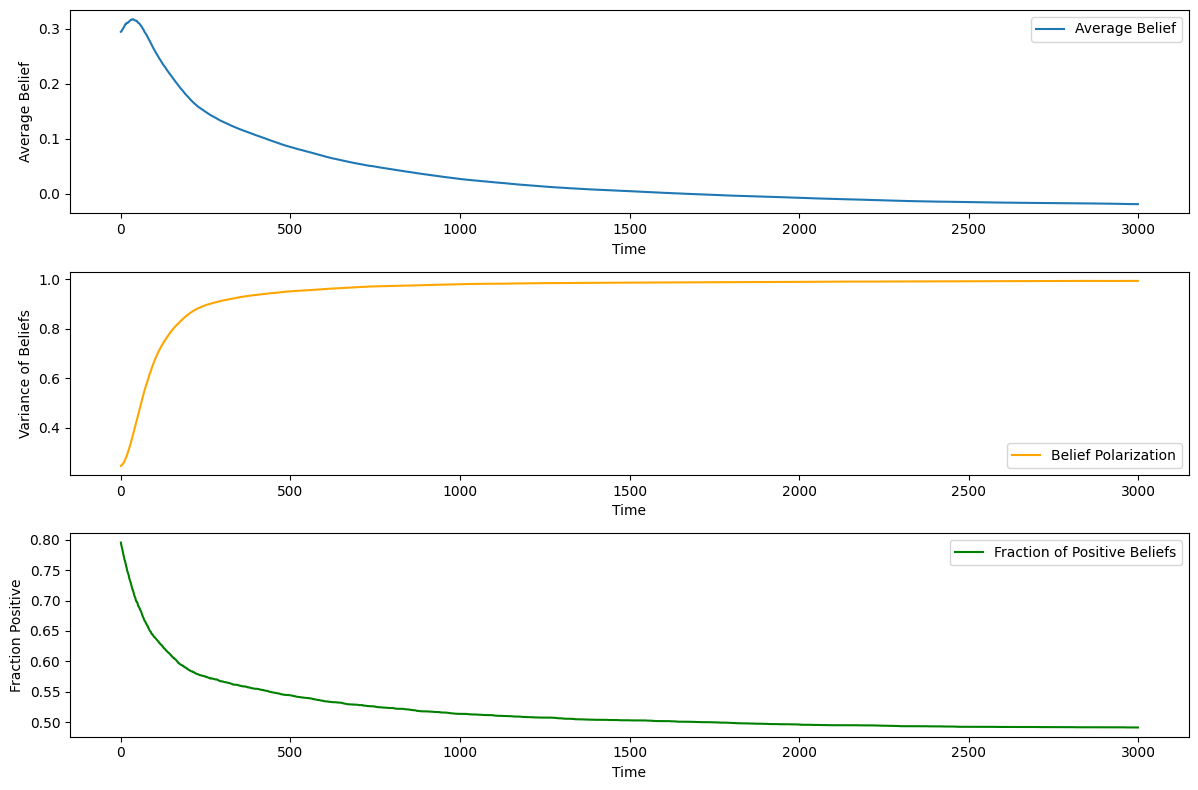

In [8]:
class Agent:
    def __init__(self, i, j, is_troll, belief, convincing_power):
        self.i = i  # Grid x-coordinate
        self.j = j  # Grid y-coordinate
        self.is_troll = is_troll  # Boolean indicating if the agent is a troll
        self.belief = belief  # Belief value between [-1, 1]
        self.convincing_power = convincing_power  # Influence strength [0, cmax]

# Parameters
N = 10000  # Population size
cmax = 0.5  # Maximum convincing power
p_plus = 0.8  # Fraction of initial positive beliefs
grid_size = int(np.sqrt(N))  # Grid dimensions
timesteps = 3000  # Simulation duration
troll_frac = 0.203

# Initialize grid and agents
grid = [
    [
        Agent(i, j,
            is_troll := np.random.rand() < troll_frac,  # Check if troll
            belief := -1.0 if is_troll else (
                np.random.uniform(0, 1) if np.random.rand() < p_plus else np.random.uniform(-1, 0)),  # Set belief based on troll status and p_plus
            convincing_power := np.random.uniform(0, cmax)  # Assign convincing power
        )
        for j in range(grid_size)
    ]
    for i in range(grid_size)
]


# Data collection lists
average_beliefs = []
belief_variances = []
positive_belief_fractions = []

# Simulation loop
for t in range(timesteps):

    # Flatten grid and filter non-troll agents once
    non_troll_agents = [agent for row in grid for agent in row if not agent.is_troll]

    # Collect statistics from non-troll agents
    non_troll_beliefs = np.array([agent.belief for agent in non_troll_agents])
    avg_belief = np.mean(non_troll_beliefs)
    var_belief = np.var(non_troll_beliefs)
    pos_frac = np.mean(non_troll_beliefs > 0)

    average_beliefs.append(avg_belief)
    belief_variances.append(var_belief)
    positive_belief_fractions.append(pos_frac)

    # Select 10% of non-troll agents for potential update
    selected_indices = np.random.choice(len(non_troll_agents), size=int(0.1 * N), replace=False)

    # Update beliefs of selected non-troll agents
    for idx in selected_indices:
        agent = non_troll_agents[idx]
        # Get neighbor coordinates with periodic boundaries
        i, j = agent.i, agent.j
        neighbors = [
            grid[(i-1) % grid_size][j],  # North
            grid[(i+1) % grid_size][j],  # South
            grid[i][(j-1) % grid_size],  # West
            grid[i][(j+1) % grid_size]   # East
        ]

        # Calculate social influence
        influence = sum(nb.convincing_power * nb.belief for nb in neighbors)
        agent.belief += influence / len(neighbors)
        agent.belief = np.clip(agent.belief, -1, 1)  # Maintain bounds

# The data lists can be analyzed or visualized as needed
time = np.arange(timesteps)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, average_beliefs, label='Average Belief')
plt.xlabel('Time')
plt.ylabel('Average Belief')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, belief_variances, label='Belief Polarization', color='orange')
plt.xlabel('Time')
plt.ylabel('Variance of Beliefs')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, positive_belief_fractions, label='Fraction of Positive Beliefs', color='green')
plt.xlabel('Time')
plt.ylabel('Fraction Positive')
plt.legend()

plt.tight_layout()
plt.show()

### Introduce trusted agents

Trusted agents have a fixed belief = 1 and higher convincing power. They can be interpreted as reputable news sources and verified profiles.

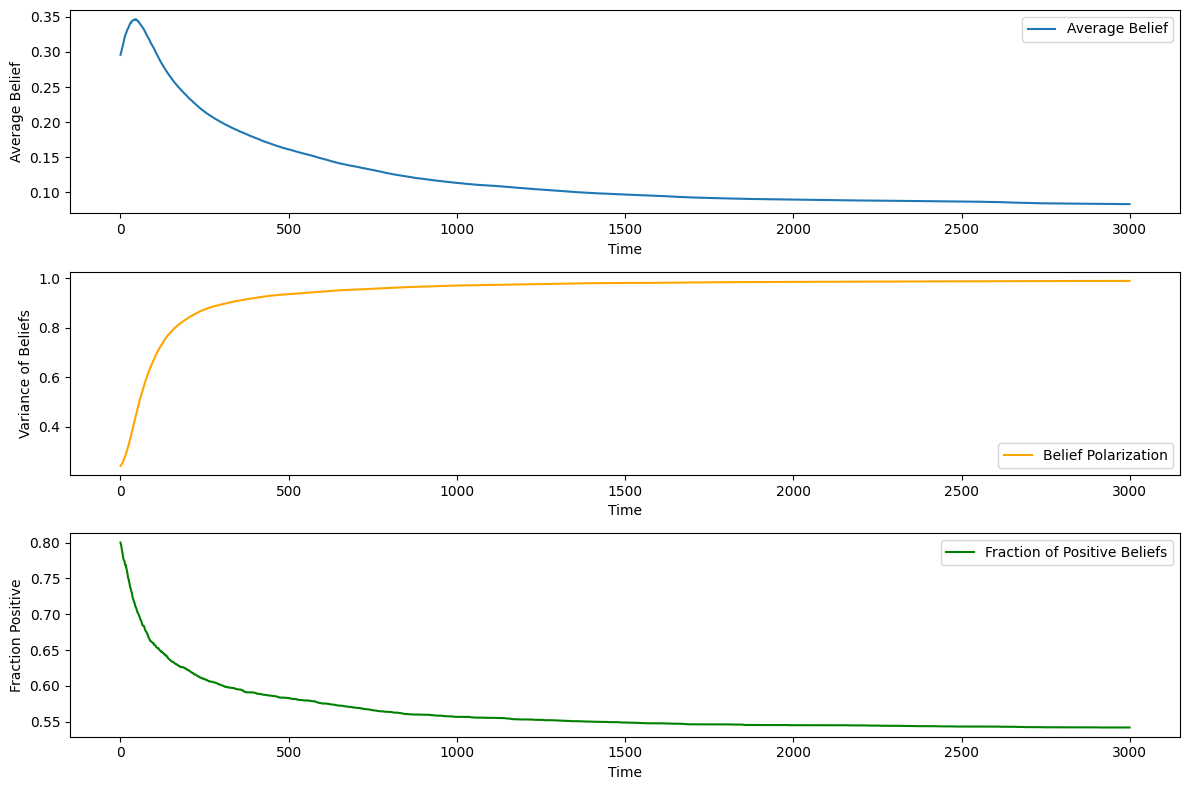

In [3]:
class Agent:
    def __init__(self, i, j, is_troll, belief, convincing_power, is_trusted):
        self.i = i  # Grid x-coordinate
        self.j = j  # Grid y-coordinate
        self.is_troll = is_troll  # Boolean indicating if the agent is a troll
        self.belief = belief  # Belief value between [-1, 1]
        self.convincing_power = convincing_power  # Influence strength [0, cmax]
        self.is_trusted = is_trusted  # Boolean indicating if the agent is trusted

# Parameters
N = 10000  # Population size
cmax = 0.5  # Maximum convincing power
p_plus = 0.8  # Fraction of initial positive beliefs
grid_size = int(np.sqrt(N))  # Grid dimensions
timesteps = 3000  # Simulation duration
troll_frac = 0.211
trusted_frac = 0.05

# Initialize grid and agents
grid = []
for i in range(grid_size):
    row = []
    for j in range(grid_size):
        is_troll = np.random.rand() < troll_frac
        is_trusted = np.random.rand() < trusted_frac
        if is_troll:
            belief = -1.0
        else:
            if is_trusted:
                belief = 1.0
            else:
                belief = np.random.uniform(0, 1) if np.random.rand() < p_plus else np.random.uniform(-1, 0)
        convincing_power = (
            np.random.uniform(0, cmax) + np.random.uniform(0, 0.2)
            if is_trusted
            else np.random.uniform(0, cmax)
        )
        row.append(Agent(i, j, is_troll, belief, convincing_power, is_trusted))
    grid.append(row)



# Data collection lists
average_beliefs = []
belief_variances = []
positive_belief_fractions = []

# Simulation loop
for t in range(timesteps):

    # Flatten grid and filter non-troll agents once
    non_troll_agents = [agent for row in grid for agent in row if (not agent.is_troll and not agent.is_trusted)]

    # Collect statistics from non-troll agents
    non_troll_beliefs = np.array([agent.belief for agent in non_troll_agents])
    avg_belief = np.mean(non_troll_beliefs)
    var_belief = np.var(non_troll_beliefs)
    pos_frac = np.mean(non_troll_beliefs > 0)

    average_beliefs.append(avg_belief)
    belief_variances.append(var_belief)
    positive_belief_fractions.append(pos_frac)

    # Select 10% of non-troll agents for potential update
    selected_indices = np.random.choice(len(non_troll_agents), size=int(0.1 * N), replace=False)

    # Update beliefs of selected non-troll agents
    for idx in selected_indices:
        agent = non_troll_agents[idx]
        # Get neighbor coordinates with periodic boundaries
        i, j = agent.i, agent.j
        neighbors = [
            grid[(i-1) % grid_size][j],  # North
            grid[(i+1) % grid_size][j],  # South
            grid[i][(j-1) % grid_size],  # West
            grid[i][(j+1) % grid_size]   # East
        ]

        # Calculate social influence
        influence = sum(nb.convincing_power * nb.belief for nb in neighbors)
        agent.belief += influence / len(neighbors)
        agent.belief = np.clip(agent.belief, -1, 1)  # Maintain bounds

# The data lists can be analyzed or visualized as needed
time = np.arange(timesteps)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, average_beliefs, label='Average Belief')
plt.xlabel('Time')
plt.ylabel('Average Belief')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, belief_variances, label='Belief Polarization', color='orange')
plt.xlabel('Time')
plt.ylabel('Variance of Beliefs')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, positive_belief_fractions, label='Fraction of Positive Beliefs', color='green')
plt.xlabel('Time')
plt.ylabel('Fraction Positive')
plt.legend()

plt.tight_layout()
plt.show()

### Intoduce reporting and shadowbanning

Giving the users the possibility to report (we assume that a user is able to detect a troll and to report it with some probability), and shadowban agents that received a certain number of reports by reducing their convincing power (which would be equivalent to decreasing the visibility of their profile or limiting the reach of their posts).

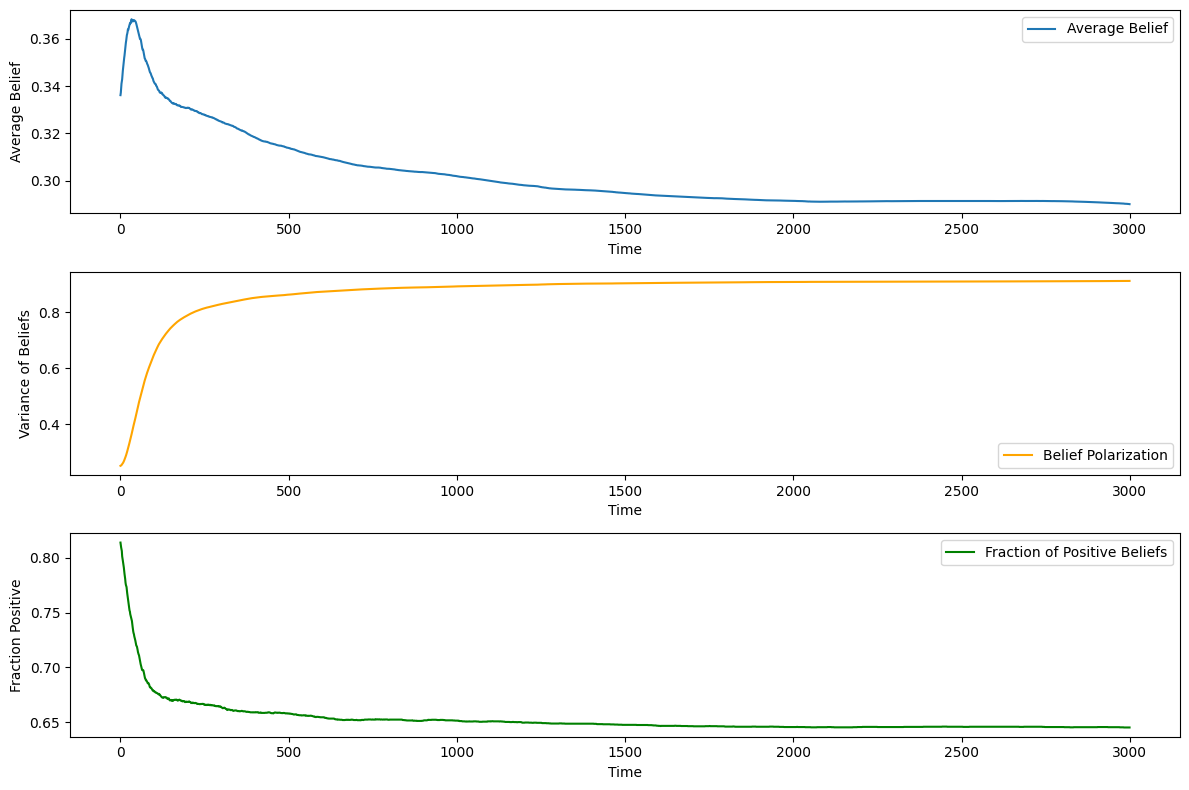

In [19]:
class Agent:
    def __init__(self, i, j, is_troll, belief, convincing_power, is_trusted):
        self.i = i  # Grid x-coordinate
        self.j = j  # Grid y-coordinate
        self.is_troll = is_troll  # Boolean indicating if the agent is a troll
        self.belief = belief  # Belief value between [-1, 1]
        self.convincing_power = convincing_power  # Influence strength [0, cmax]
        self.is_trusted = is_trusted  # Boolean indicating if the agent is trusted
        self.reports = 0  # Number of reports received
        self.shadowbanned = False  # Shadowban status

    @property
    def effective_convincing_power(self):
        """Return the convincing power, halved if the agent is shadowbanned."""
        return self.convincing_power / 2 if self.shadowbanned else self.convincing_power


# Parameters
N = 10000  # Population size
cmax = 0.5  # Maximum convincing power
p_plus = 0.8  # Fraction of initial positive beliefs
grid_size = int(np.sqrt(N))  # Grid dimensions
timesteps = 3000  # Simulation duration
troll_frac = 0.211
trusted_frac = 0.05
report_threshold = 5  # Reports required to shadowban a user

# Initialize grid and agents
grid = [
    [
        Agent(i, j,
            is_troll := np.random.rand() < troll_frac,  # Check if troll
            belief :=
              -1.0 if is_troll else (
                  1 if is_trusted else(
                      np.random.uniform(0, 1) if np.random.rand() < p_plus else
                      np.random.uniform(-1, 0))),  # Set belief based on troll status and p_plus
            convincing_power := np.random.uniform(0, cmax) + np.random.uniform(0, 0.2) if is_trusted else np.random.uniform(0, cmax),  # Assign convincing power
            is_trusted := np.random.rand() < trusted_frac  # Assign trusted status
        )
        for j in range(grid_size)
    ]
    for i in range(grid_size)
]

# Data collection lists
average_beliefs = []
belief_variances = []
positive_belief_fractions = []

# Simulation loop
for t in range(timesteps):

    # Flatten grid and filter troll and trusted agents once
    non_troll_agents = [
        agent for row in grid for agent in row
        if not agent.is_troll and not agent.is_trusted]

    # Collect statistics from non-troll agents
    non_troll_beliefs = np.array([agent.belief for agent in non_troll_agents])
    avg_belief = np.mean(non_troll_beliefs)
    var_belief = np.var(non_troll_beliefs)
    pos_frac = np.mean(non_troll_beliefs > 0)

    average_beliefs.append(avg_belief)
    belief_variances.append(var_belief)
    positive_belief_fractions.append(pos_frac)

    # Select 10% of non-troll and non trusted agents for potential update
    selected_indices = np.random.choice(len(non_troll_agents), size=int(0.1 * N), replace=False)

    # Update beliefs of selected non-troll agents
    for idx in selected_indices:
        agent = non_troll_agents[idx]
        # Get neighbor coordinates with periodic boundaries
        i, j = agent.i, agent.j
        neighbors = [
            grid[(i-1) % grid_size][j],  # North
            grid[(i+1) % grid_size][j],  # South
            grid[i][(j-1) % grid_size],  # West
            grid[i][(j+1) % grid_size]   # East
        ]

        # Calculate social influence using effective convincing power
        influence = sum(nb.effective_convincing_power * nb.belief for nb in neighbors)
        agent.belief += influence / len(neighbors)
        agent.belief = np.clip(agent.belief, -1, 1)  # Maintain bounds

    # Simulate user-driven protections
    interactors = random.sample(
        [agent for row in grid for agent in row if not agent.shadowbanned],
        k=int(0.1 * N)
    )

    for i in range(0, len(interactors), 2):
        if i + 1 >= len(interactors):
            break
        a1, a2 = interactors[i], interactors[i + 1]

        # Simulate content flagging
        if a1.is_troll and not a2.is_troll:
            if random.random() < 0.7:
                a1.reports += 1
        elif a2.is_troll and not a1.is_troll:
            if random.random() < 0.7:
                a2.reports += 1

    # Apply shadowban based on report threshold
    for row in grid:
        for agent in row:
            if agent.reports >= report_threshold:
                agent.shadowbanned = True

# Visualization of results
time = np.arange(timesteps)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, average_beliefs, label='Average Belief')
plt.xlabel('Time')
plt.ylabel('Average Belief')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, belief_variances, label='Belief Polarization', color='orange')
plt.xlabel('Time')
plt.ylabel('Variance of Beliefs')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, positive_belief_fractions, label='Fraction of Positive Beliefs', color='green')
plt.xlabel('Time')
plt.ylabel('Fraction Positive')
plt.legend()

plt.tight_layout()
plt.show()


### Introducing community notes

Community notes are based on a majority voting of the neoghbors. If the agent believes in a fake news and the majority of neighbors disagrees, then a community note is introduced and the belief of the agent is increased towards the positive news (> 0)

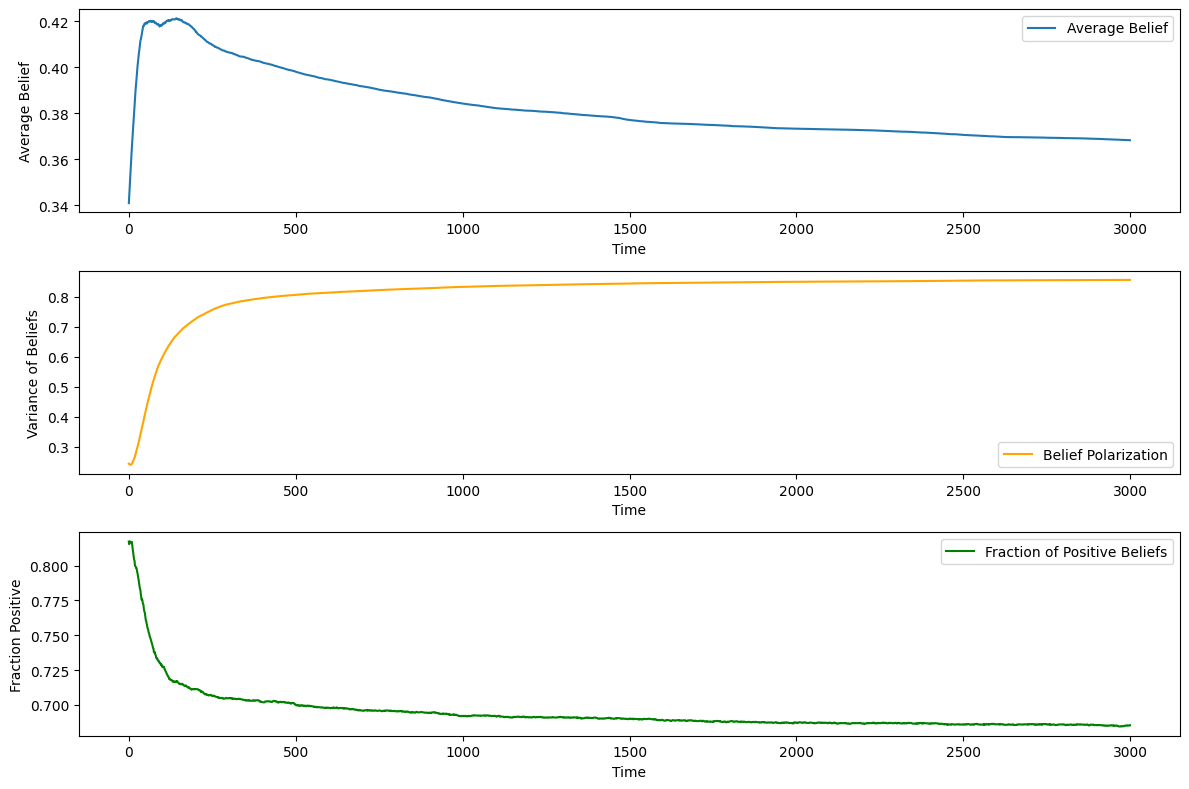

In [25]:
class Agent:
    def __init__(self, i, j, is_troll, belief, convincing_power, is_trusted):
        self.i = i  # Grid x-coordinate
        self.j = j  # Grid y-coordinate
        self.is_troll = is_troll  # Boolean indicating if the agent is a troll
        self.belief = belief  # Belief value between [-1, 1]
        self.convincing_power = convincing_power  # Influence strength [0, cmax]
        self.is_trusted = is_trusted  # Boolean indicating if the agent is trusted
        self.reports = 0  # Number of reports received
        self.shadowbanned = False  # Shadowban status

    @property
    def effective_convincing_power(self):
        """Return the convincing power, halved if the agent is shadowbanned."""
        return self.convincing_power / 2 if self.shadowbanned else self.convincing_power

# Parameters
N = 10000  # Population size
cmax = 0.5  # Maximum convincing power
p_plus = 0.8  # Fraction of initial positive beliefs
grid_size = int(np.sqrt(N))  # Grid dimensions
timesteps = 3000  # Simulation duration
troll_frac = 0.211
trusted_frac = 0.05
report_threshold = 5  # Reports required to shadowban a user
community_note_threshold = 2  # Number of disagreements required to trigger community notes

# Initialize grid and agents
grid = [
    [
        Agent(i, j,
            is_troll := np.random.rand() < troll_frac,  # Check if troll
            belief :=
              -1.0 if is_troll else (
                  1 if np.random.rand() < trusted_frac else(
                      np.random.uniform(0, 1) if np.random.rand() < p_plus else
                      np.random.uniform(-1, 0))),  # Set belief based on troll status and p_plus
            convincing_power := np.random.uniform(0, cmax) + np.random.uniform(0, 0.2) if np.random.rand() < trusted_frac else np.random.uniform(0, cmax),  # Assign convincing power
            is_trusted := np.random.rand() < trusted_frac  # Assign trusted status
        )
        for j in range(grid_size)
    ]
    for i in range(grid_size)
]

# Data collection lists
average_beliefs = []
belief_variances = []
positive_belief_fractions = []

# Simulation loop
for t in range(timesteps):

    # Flatten grid and filter non-shadowbanned non-troll agents once
    non_troll_agents = [
        agent for row in grid for agent in row
        if not agent.is_troll and not agent.is_trusted
    ]

    # Collect statistics from non-shadowbanned non-troll agents
    non_troll_beliefs = np.array([agent.belief for agent in non_troll_agents])
    avg_belief = np.mean(non_troll_beliefs)
    var_belief = np.var(non_troll_beliefs)
    pos_frac = np.mean(non_troll_beliefs > 0)

    average_beliefs.append(avg_belief)
    belief_variances.append(var_belief)
    positive_belief_fractions.append(pos_frac)

    # Select 10% of non-shadowbanned non-troll agents for potential update
    selected_indices = np.random.choice(len(non_troll_agents), size=int(0.1 * N), replace=False)

    # Update beliefs of selected non-troll agents
    for idx in selected_indices:
        agent = non_troll_agents[idx]
        # Get neighbor coordinates with periodic boundaries
        i, j = agent.i, agent.j
        neighbors = [
            grid[(i-1) % grid_size][j],  # North
            grid[(i+1) % grid_size][j],  # South
            grid[i][(j-1) % grid_size],  # West
            grid[i][(j+1) % grid_size]   # East
        ]
        if agent.belief < 0:

            # Track the number of disagreements with neighbors
            disagreements = sum(
                1 for nb in neighbors if not nb.is_troll and np.sign(nb.belief) != np.sign(agent.belief)
            )

            # Apply community notes effect if disagreements exceed threshold
            if disagreements > community_note_threshold:
                agent.belief += 0.1  # Increase belief in true news

        # Calculate social influence using effective convincing power
        influence = sum(nb.effective_convincing_power * nb.belief for nb in neighbors)
        agent.belief += influence / len(neighbors)
        agent.belief = np.clip(agent.belief, -1, 1)  # Maintain bounds

    # Simulate user-driven protections
    interactors = random.sample(
        [agent for row in grid for agent in row if not agent.shadowbanned],
        k=int(0.1 * N)
    )

    for i in range(0, len(interactors), 2):
        if i + 1 >= len(interactors):
            break
        a1, a2 = interactors[i], interactors[i + 1]

        # Simulate content flagging
        if a1.is_troll and not a2.is_troll:
            if random.random() < 0.7:
                a1.reports += 1
        elif a2.is_troll and not a1.is_troll:
            if random.random() < 0.7:
                a2.reports += 1

    # Apply shadowban based on report threshold
    for row in grid:
        for agent in row:
            if agent.reports >= report_threshold:
                agent.shadowbanned = True

# Visualization of results
time = np.arange(timesteps)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, average_beliefs, label='Average Belief')
plt.xlabel('Time')
plt.ylabel('Average Belief')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, belief_variances, label='Belief Polarization', color='orange')
plt.xlabel('Time')
plt.ylabel('Variance of Beliefs')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, positive_belief_fractions, label='Fraction of Positive Beliefs', color='green')
plt.xlabel('Time')
plt.ylabel('Fraction Positive')
plt.legend()

plt.tight_layout()
plt.show()


Improvement: the agent belief is increased and the convincing power of trolls is decreased when a community note is added

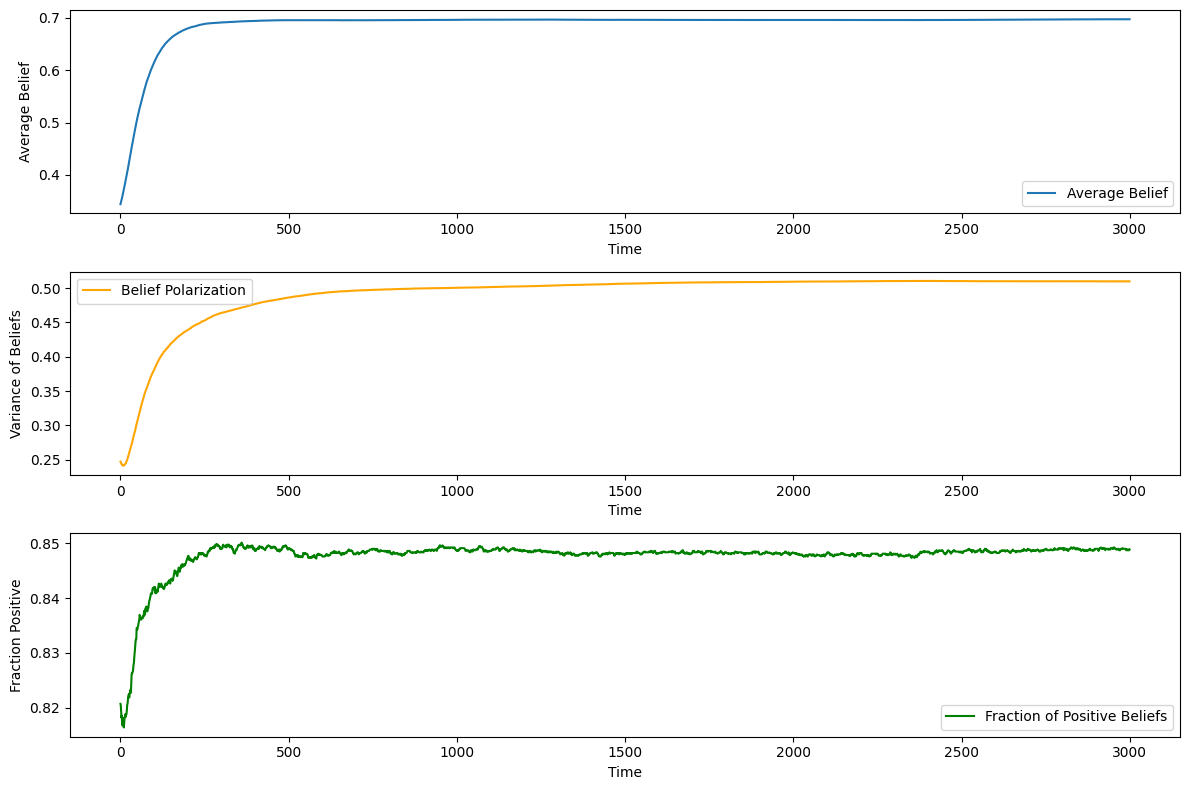

In [26]:
class Agent:
    def __init__(self, i, j, is_troll, belief, convincing_power, is_trusted):
        self.i = i  # Grid x-coordinate
        self.j = j  # Grid y-coordinate
        self.is_troll = is_troll  # Boolean indicating if the agent is a troll
        self.belief = belief  # Belief value between [-1, 1]
        self.convincing_power = convincing_power  # Influence strength [0, cmax]
        self.is_trusted = is_trusted  # Boolean indicating if the agent is trusted
        self.reports = 0  # Number of reports received
        self.shadowbanned = False  # Shadowban status

    @property
    def effective_convincing_power(self):
        """Return the convincing power, halved if the agent is shadowbanned."""
        return self.convincing_power / 2 if self.shadowbanned else self.convincing_power

# Parameters
N = 10000  # Population size
cmax = 0.5  # Maximum convincing power
p_plus = 0.8  # Fraction of initial positive beliefs
grid_size = int(np.sqrt(N))  # Grid dimensions
timesteps = 3000  # Simulation duration
troll_frac = 0.211
trusted_frac = 0.05
report_threshold = 5  # Reports required to shadowban a user
community_note_threshold = 2  # Number of disagreements required to trigger community notes

# Initialize grid and agents
grid = [
    [
        Agent(i, j,
            is_troll := np.random.rand() < troll_frac,  # Check if troll
            belief :=
              -1.0 if is_troll else (
                  1 if np.random.rand() < trusted_frac else(
                      np.random.uniform(0, 1) if np.random.rand() < p_plus else
                      np.random.uniform(-1, 0))),  # Set belief based on troll status and p_plus
            convincing_power := np.random.uniform(0, cmax) + np.random.uniform(0, 0.2) if np.random.rand() < trusted_frac else np.random.uniform(0, cmax),  # Assign convincing power
            is_trusted := np.random.rand() < trusted_frac  # Assign trusted status
        )
        for j in range(grid_size)
    ]
    for i in range(grid_size)
]

# Data collection lists
average_beliefs = []
belief_variances = []
positive_belief_fractions = []



# Simulation loop
for t in range(timesteps):

    # Flatten grid and filter non-shadowbanned agents (including trolls) for selection
    all_agents = [
        agent for row in grid for agent in row
        #if not agent.shadowbanned
    ]

    # Collect statistics from non-shadowbanned non-troll agents
    non_troll_agents = [agent for agent in all_agents if not agent.is_troll]
    non_troll_beliefs = np.array([agent.belief for agent in non_troll_agents])
    avg_belief = np.mean(non_troll_beliefs)
    var_belief = np.var(non_troll_beliefs)
    pos_frac = np.mean(non_troll_beliefs > 0)

    average_beliefs.append(avg_belief)
    belief_variances.append(var_belief)
    positive_belief_fractions.append(pos_frac)

    # Select 10% of all non-shadowbanned agents for potential update
    selected_indices = np.random.choice(len(all_agents), size=int(0.1 * N), replace=False)

    # Update beliefs of selected agents (non-troll and troll agents)
    for idx in selected_indices:
        agent = all_agents[idx]
        # Get neighbor coordinates with periodic boundaries
        i, j = agent.i, agent.j
        neighbors = [
            grid[(i-1) % grid_size][j],  # North
            grid[(i+1) % grid_size][j],  # South
            grid[i][(j-1) % grid_size],  # West
            grid[i][(j+1) % grid_size]   # East
        ]
        if agent.belief < 0:
            # Track the number of disagreements with neighbors
            disagreements = sum(
                1 for nb in neighbors if not nb.is_troll and np.sign(nb.belief) != np.sign(agent.belief)
            )

            # Apply community notes effect:
            if disagreements > community_note_threshold:
                # For non-troll agents with belief < 0, increase belief
                if not agent.is_troll:
                    agent.belief += 0.1  # Increase belief, clip to [-1, 1] later
                    agent.belief = np.clip(agent.belief, -1, 1)  # Ensure belief remains within bounds

                # For troll agents, decrease convincing power
                else:
                    agent.convincing_power *= 0.7  # Reduce convincing power by 30%

        # For non-troll agents, calculate social influence and update belief
        if not agent.is_troll:
            influence = sum(nb.effective_convincing_power * nb.belief for nb in neighbors)
            agent.belief += influence / len(neighbors)
            agent.belief = np.clip(agent.belief, -1, 1)  # Maintain bounds

    # Simulate user-driven protections
    interactors = random.sample(
        [agent for row in grid for agent in row if not agent.shadowbanned],
        k=int(0.1 * N)
    )

    for i in range(0, len(interactors), 2):
        if i + 1 >= len(interactors):
            break
        a1, a2 = interactors[i], interactors[i + 1]

        # Simulate content flagging
        if a1.is_troll and not a2.is_troll:
            if random.random() < 0.7:
                a1.reports += 1
        elif a2.is_troll and not a1.is_troll:
            if random.random() < 0.7:
                a2.reports += 1

    # Apply shadowban based on report threshold
    for row in grid:
        for agent in row:
            if agent.reports >= report_threshold:
                agent.shadowbanned = True

# Visualization of results
time = np.arange(timesteps)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, average_beliefs, label='Average Belief')
plt.xlabel('Time')
plt.ylabel('Average Belief')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, belief_variances, label='Belief Polarization', color='orange')
plt.xlabel('Time')
plt.ylabel('Variance of Beliefs')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, positive_belief_fractions, label='Fraction of Positive Beliefs', color='green')
plt.xlabel('Time')
plt.ylabel('Fraction Positive')
plt.legend()

plt.tight_layout()
plt.show()